# Imports

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

Gather SP500 ETF data

In [42]:
ticker = 'INTC' #What to invest

start_date = '2017-01-01'
end_date = '2024-01-01'

interval ='3M' #Frequency

amount = 500 # How much 

In [43]:
data = yf.download(ticker,start=start_date, end=end_date)

data= data.dropna()

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,36.610001,36.930000,36.270000,36.599998,29.879772,20196500
2017-01-04,36.709999,36.770000,36.340000,36.410000,29.724669,15915700
2017-01-05,36.450001,36.720001,36.310001,36.349998,29.675673,13986000
2017-01-06,36.590000,36.680000,36.189999,36.480000,29.781807,15114000
2017-01-09,36.480000,36.889999,36.480000,36.610001,29.887945,19461400
...,...,...,...,...,...,...
2023-12-22,47.250000,48.160000,47.200001,48.000000,47.365639,30053700
2023-12-26,48.919998,50.520000,48.709999,50.500000,49.832600,60287400
2023-12-27,50.630001,51.279999,50.189999,50.759998,50.089161,52148000


In [44]:
resampled_data = data.resample(interval).first() # To get data every 3 months (interval we want)

resampled_data

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_86319/1076406976.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data = data.resample(interval).first() # To get data every 3 months (interval we want)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-31,36.610001,36.930000,36.270000,36.599998,29.879772,20196500
2017-04-30,36.820000,36.950001,36.020000,36.520000,29.814459,28380600
2017-07-31,36.110001,36.400002,35.939999,36.310001,29.854641,24825600
2017-10-31,35.660000,36.430000,35.570000,36.349998,30.109869,38710200
2018-01-31,45.970001,46.709999,45.590000,46.709999,38.981850,47813700
2018-04-30,47.700001,48.470001,47.450001,47.650002,40.001984,28840400
2018-07-31,51.639999,53.419998,51.439999,53.330002,45.074059,27600800
2018-10-31,48.060001,48.910000,48.000000,48.810001,41.491875,28060700
2019-01-31,46.950001,48.470001,46.860001,48.220001,41.239620,28335300


For loop to create df to see invensments 

In [45]:
total_invesment = 0
total_shares = 0 

dca_log = []

for date, row in resampled_data.iterrows():
    price = row['Adj Close']

    total_shares += amount / price
    total_invesment += amount

    dca_log.append({
        'Date': date,
        'Price': price,
        'Total Shares': total_shares,
        'Total Invesment': total_invesment,
        'Portfolio Value': total_shares * price
    })

dca_df = pd.DataFrame(dca_log)

In [46]:
dca_df

,Date,Price,Total Shares,Total Invesment,Portfolio Value
0,2017-01-31,29.879772,16.733729,500,500.000000
1,2017-04-30,29.814459,33.504115,1000,998.907064
2,2017-07-31,29.854641,50.251930,1500,1500.253330
3,2017-10-31,30.109869,66.857781,2000,2013.079032
4,2018-01-31,38.981850,79.684263,2500,3106.239974
5,2018-04-30,40.001984,92.183643,3000,3687.528598
6,2018-07-31,45.074059,103.276499,3500,4655.090941
7,2018-10-31,41.491875,115.327051,4000,4785.135537
8,2019-01-31,41.239620,127.451314,4500,5256.043771
9,2019-04-30,41.938076,139.373654,5000,5845.062882


In [47]:
final_portfolio_value = total_shares * data.iloc[-1]['Adj Close']
total_profit = final_portfolio_value - total_invesment

print(f'Portolio Value: {final_portfolio_value.round(2)} | Total Profit: {total_profit.round(2)}')

Portolio Value: 18552.39 | Total Profit: 4052.39


In [48]:
years_invested = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days / 365.25
annualized_return = ((final_portfolio_value / total_invesment) ** (1 / years_invested)) - 1
print(f'Annualized Return: {annualized_return * 100:.2f}%')

Annualized Return: 3.58%


Visualise everything

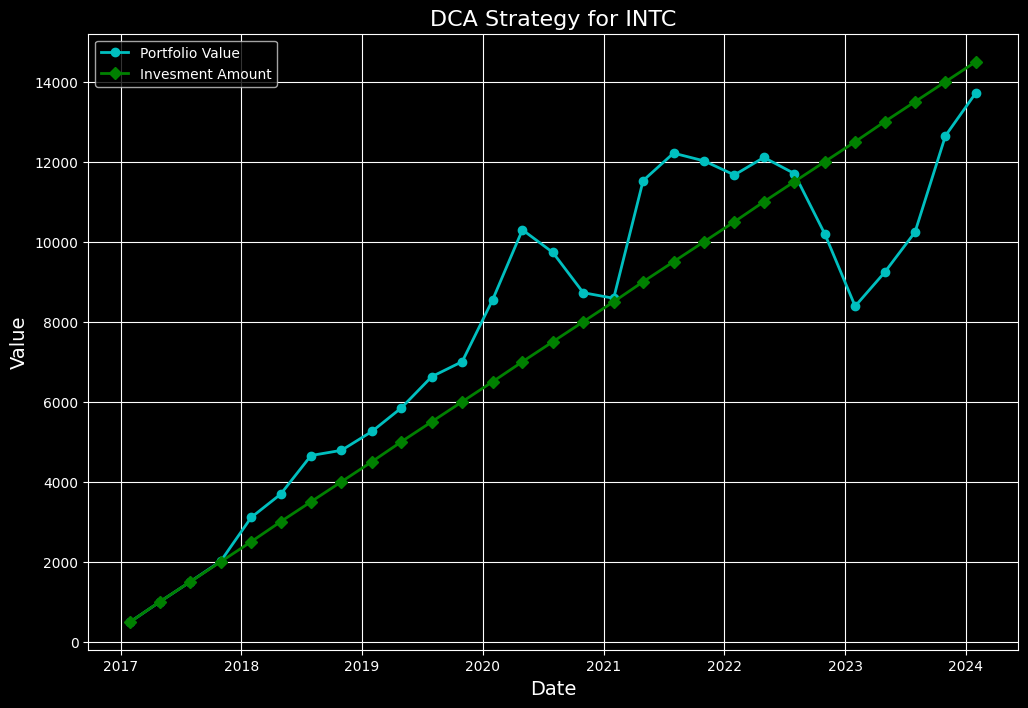

In [50]:
plt.style.use('dark_background')

plt.figure(figsize=(12,8))

plt.plot(dca_df['Date'],dca_df['Portfolio Value'],marker='o',color='c',linewidth=2,label='Portfolio Value')
plt.plot(dca_df['Date'],dca_df['Total Invesment'], marker='D',color='g',linewidth=2,label='Invesment Amount')

plt.title(f'DCA Strategy for {ticker}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()